# Part I - Analysis of Prosper's Loan Data
## by AKALAZU, Chidinma Stephanie

## Introduction
> To carry out the analysis of Prosper's loan data analysis, this analysis makes use of loans data from Prosper. This loan dataset contains 113,937 loan observations and 81 columns/fields which include interest rate, lender yeild, borrower's income, loan close date, credit rating, borrower's occupation, estimated loss, loan tenure, investors and many other field names..  

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
chi=pd.read_csv('prosperLoanData.csv')

#### The  dataset structure

In [3]:
chi.shape

(113937, 81)

#### What is/are the main feature(s) of interest in your dataset?

In [4]:
chi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
#Show the top five rows of the dataset
chi.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
#Show the prosper loan dataset description
chi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ListingNumber,113937.0,627885.692506,328076.236386,4.00000,400919.000000,600554.000000,892634.00000,1.255725e+06
Term,113937.0,40.830248,10.436212,12.00000,36.000000,36.000000,36.00000,6.000000e+01
BorrowerAPR,113912.0,0.218828,0.080364,0.00653,0.156290,0.209760,0.28381,5.122900e-01
BorrowerRate,113937.0,0.192764,0.074818,0.00000,0.134000,0.184000,0.25000,4.975000e-01
LenderYield,113937.0,0.182701,0.074516,-0.01000,0.124200,0.173000,0.24000,4.925000e-01
EstimatedEffectiveYield,84853.0,0.168661,0.068467,-0.18270,0.115670,0.161500,0.22430,3.199000e-01
EstimatedLoss,84853.0,0.080306,0.046764,0.00490,0.042400,0.072400,0.11200,3.660000e-01
EstimatedReturn,84853.0,0.096068,0.030403,-0.18270,0.074080,0.091700,0.11660,2.837000e-01
ProsperRating (numeric),84853.0,4.072243,1.673227,1.00000,3.000000,4.000000,5.00000,7.000000e+00
ProsperScore,84853.0,5.950067,2.376501,1.00000,4.000000,6.000000,8.00000,1.100000e+01


In [7]:
#Show the missing values in the dataset
chi.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [8]:
#Show the duplicate data in the dataset
chi.duplicated().sum()

0

In [9]:
#Show the list of columns to be used in the dataset
chi.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [10]:
#These are the columns that would needed for the Prosper's loan data analytics
fields = ['LenderYield','LoanOriginalAmount', 'BorrowerRate','Occupation','StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
       'EmploymentStatus', 'IsBorrowerHomeowner']

In [11]:
#Use the fields to make new data
chidf=chi[fields]
chidf.head()

,LenderYield,LoanOriginalAmount,BorrowerRate,Occupation,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,IsBorrowerHomeowner
0,0.1380,9425,0.1580,Other,3083.333333,36,NaN,Self-employed,True
1,0.0820,10000,0.0920,Professional,6125.000000,36,A,Employed,False
2,0.2400,3001,0.2750,Other,2083.333333,36,NaN,Not available,False
3,0.0874,10000,0.0974,Skilled Labor,2875.000000,36,A,Employed,True
4,0.1985,15000,0.2085,Executive,9583.333333,36,D,Employed,True


In [12]:
#Show the number of missing values in each columns
chidf.isnull().sum()

LenderYield                  0
LoanOriginalAmount           0
BorrowerRate                 0
Occupation                3588
StatedMonthlyIncome          0
Term                         0
ProsperRating (Alpha)    29084
EmploymentStatus          2255
IsBorrowerHomeowner          0
dtype: int64

In [13]:
#Remove all the observation with missing value
chidf.dropna(inplace=True, axis=0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
#Check for the missing values
chidf.isnull().sum()

LenderYield              0
LoanOriginalAmount       0
BorrowerRate             0
Occupation               0
StatedMonthlyIncome      0
Term                     0
ProsperRating (Alpha)    0
EmploymentStatus         0
IsBorrowerHomeowner      0
dtype: int64

In [15]:
#Check the data types of each columns
chidf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 9 columns):
LenderYield              83520 non-null float64
LoanOriginalAmount       83520 non-null int64
BorrowerRate             83520 non-null float64
Occupation               83520 non-null object
StatedMonthlyIncome      83520 non-null float64
Term                     83520 non-null int64
ProsperRating (Alpha)    83520 non-null object
EmploymentStatus         83520 non-null object
IsBorrowerHomeowner      83520 non-null bool
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 5.8+ MB


In [16]:
#The New Dataset Dimension
chidf.shape

(83520, 9)

In [17]:
#Rename the Dataset columns for easy identifications
chidf.rename(columns={'LenderYield': 'LY','LoanOriginalAmount': 'LOA', 'BorrowerRate':'BR','Occupation':'OC',
                      'StatedMonthlyIncome':'SMI', 'Term':'TM', 'ProsperRating (Alpha)':'PRA', 
                      'EmploymentStatus':'ES', 'IsBorrowerHomeowner':'IBH'}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [18]:
#Show the top five row of the new dataset
chidf.head()

,LY,LOA,BR,OC,SMI,TM,PRA,ES,IBH
1,0.0820,10000,0.0920,Professional,6125.000000,36,A,Employed,False
3,0.0874,10000,0.0974,Skilled Labor,2875.000000,36,A,Employed,True
4,0.1985,15000,0.2085,Executive,9583.333333,36,D,Employed,True
5,0.1214,15000,0.1314,Professional,8333.333333,60,B,Employed,True
6,0.2612,3000,0.2712,Sales - Retail,2083.333333,36,E,Employed,False


## The Observations from the Dataset

#### The dataset structure
The original dataset has dimension of 113937 rows and 81 columns. But the data to be used for further analysis only has data structure of 83520 rows and 9 features - out of which one is our variable of interest or target.

#### The Main feature of my dataset interest
My main variable of interest in my dataset carved out from the main dataset is lender yield

#### Features in the dataset I think will help support my investigation into my feature of interest?
From the domain knowledge of credit industry business I posses, I think the features that would help me on Borrower's cost that support my investigation in the cause are the ClosedDate, StatedMonthly Income, LenderYield, Occupation, Term, Loan original amount, Prosper Rating Alpha, Employment Status, and being a home owner or not, should be my main causes in investigating and examining the main features of interest in my dataset.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


#### Examining the Histogram of Variable of Interest (Lender Yield) 

Text(0.5,1,"Histogram of Lender's Yield")

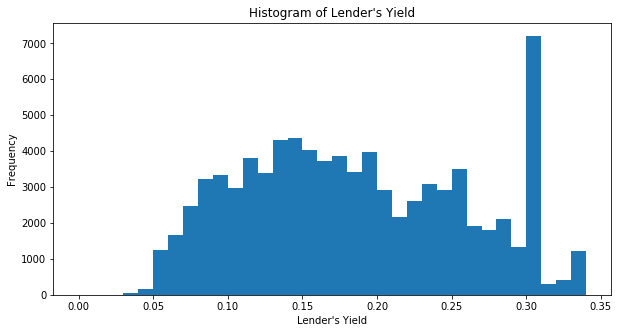

In [19]:
#Visualise the variable of interest using histogram plot
bins = np.arange(0, chidf['LY'].max()+0.001, 0.01)
plt.figure(figsize=[10, 5])
plt.hist(data = chidf, x = 'LY', bins = bins);
plt.xlabel("Lender's Yield")
plt.ylabel('Frequency')
plt.title("Histogram of Lender's Yield")

> From the figure above, the distribution of the Lender's Yield does not look normal. Rather, its properties strike a semblance with multimodal. As can be seen from the figure, the Proper's loan have a lot of its borrower's cost mostly centered between 0.1 and 0.28.

#### Examining the factors that can help explain the variation in Lender's Yield

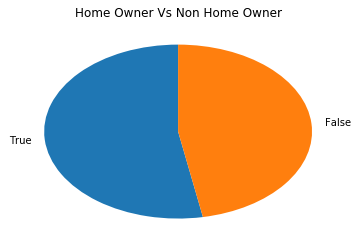

In [20]:
#Plot the homeowner in pie charts to show whether slice of those who are owner and those who are not.
def pie_chart():
    steph = chidf['IBH'].value_counts()
    plt.pie(steph, labels = steph.index, startangle = 90, counterclock = True)
    plt.title('Home Owner Vs Non Home Owner')
pie_chart()

> _From the bivariate figure above, it is quite glaring that there is barely any visible difference between the number of True and False Home owners and non home owner..._

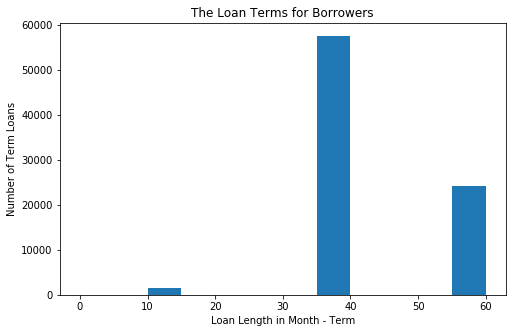

In [21]:
#Using Histogram to di Loan's Term
bins = np.arange(0, chidf['TM'].max()+5, 5)
plt.figure(figsize=[8, 5])
plt.hist(data=chidf, x = 'TM', bins = bins)
plt.xlabel('Loan Length in Month - Term')
plt.title('The Loan Terms for Borrowers')
plt.ylabel('Number of Term Loans');

> _As seen from the visual above, 36 months is the most loan terms most borrowers normally go for._

Text(0.5,0,"Prosper's Rating - Alpha")

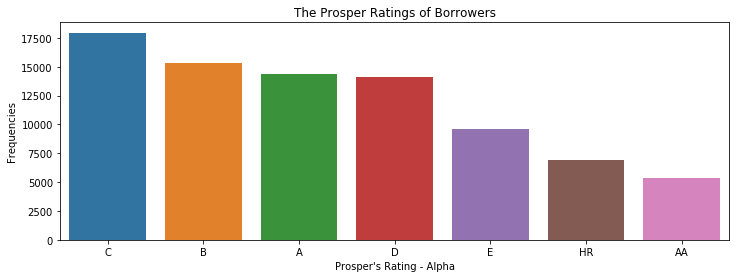

In [22]:
#Show the bar chart of Prosper's Rating
def bar_graph():
    plt.figure(figsize=[12, 4])
    hm=sns.countplot(x=chidf['PRA'],
                   order=chidf['PRA'].value_counts(ascending=False).index)
    ab=chidf['PRA'].value_counts(ascending=False).values
bar_graph()
plt.title('The Prosper Ratings of Borrowers')
plt.ylabel('Frequencies')
plt.xlabel("Prosper's Rating - Alpha")

> _The AA and HR are the highest as they are the two best ratings while a lot of borrower have C and B which is more or less average Prosper's ratings_

Text(0.5,0,'Employment Status')

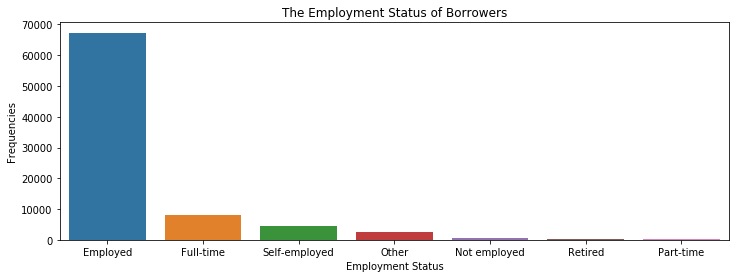

In [23]:
#Show the Bar Chart of Employee in Bar Chart
def bar_graph1():
    plt.figure(figsize=[12, 4])
    hm=sns.countplot(x=chidf['ES'],
                   order=chidf['ES'].value_counts(ascending=False).index)
    abs1=chidf['ES'].value_counts(ascending=False).values
bar_graph1()
plt.title('The Employment Status of Borrowers')
plt.ylabel('Frequencies')
plt.xlabel("Employment Status")

> _As observed from the visual, those who are employed constitute a higher percentage of those who sought loan from Prosper and this follows by Full-time. While those are retired, unemployed and part-time comprises who barely demand for loan._

Text(0.5,1,'Histogram of Original Loan Amount')

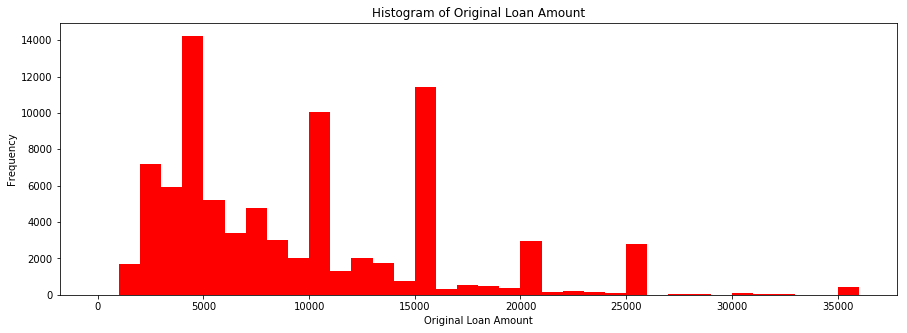

In [24]:
#Visualise the original loam amount in histogram plot
plt.figure(figsize=[15, 5])
plt.hist(data = chidf, x = 'LOA', bins = np.arange(0, chidf['LOA'].max()+2000, 1000),
         color="red")
plt.xlabel("Original Loan Amount")
plt.ylabel('Frequency')
plt.title("Histogram of Original Loan Amount")

> _From the graph above, it is evident that the minimum starts from 1,000 and the maximum is 35,000. While this original loan amount series data is not normally distributed, most loan amount being sought after is in circa 5,000 and very few loans were offered in higher amount of 15,000._

Text(0.5,1,'Histogram of Borrower Monthly Income')

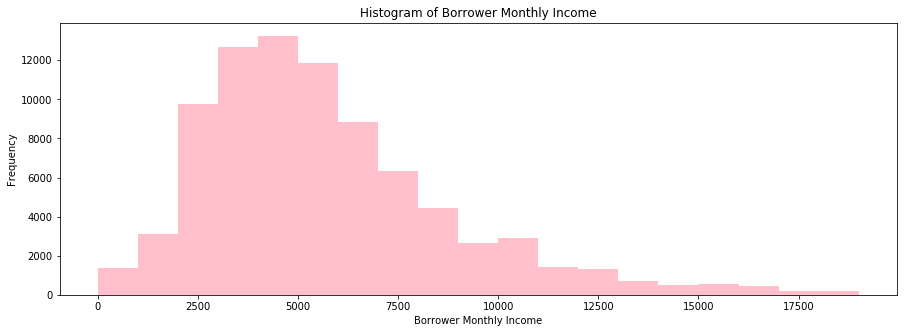

In [25]:
#Visualise the borrower's monthly income in histogram plot
plt.figure(figsize=[15, 5])
plt.hist(data = chidf, x = 'SMI', bins=np.arange(0, 20000, 1000), color='pink')
plt.xlabel("Borrower Monthly Income")
plt.ylabel('Frequency')
plt.title("Histogram of Borrower Monthly Income")

> _From the graph above, it is evident that the minimum borrower monthly income starts from 0 and the maximum is around 20,000. While this borrower monthly income series data is not normally distributed, most borrower's monthly income is between 2,500 and 10,000._

Text(0.5,1,'Histogram of Borrower Rate')

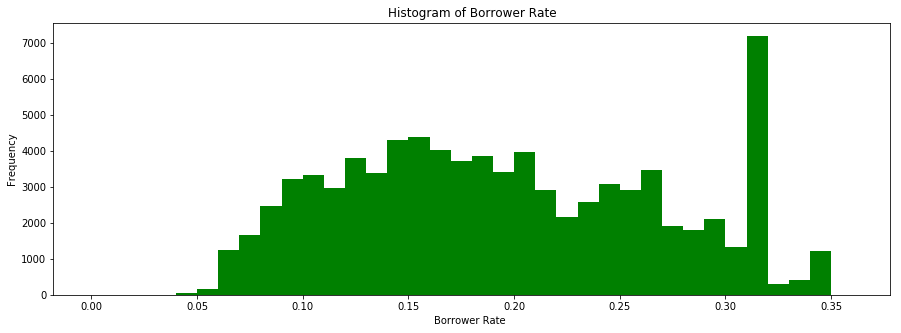

In [26]:
#Visualise the borrower's rates in histogram plot
plt.figure(figsize=[15, 5])
plt.hist(data = chidf, x = 'BR', bins=np.arange(0, chidf['BR'].max()+0.001, 0.01), color='green')
plt.xlabel("Borrower Rate ")
plt.ylabel('Frequency')
plt.title("Histogram of Borrower Rate")

> From the figure above, the distribution of the Borrower's Rate does not look normal. Rather, its properties strike a semblance with multimodal. As can be seen from the figure, the Proper's loan have a lot of its borrower's cost mostly centered between 0.1 and 0.30.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Given the visual investigated,it is observed that the lender's yield is not normally distributed. It is however observed to have multimodal distribution as the visual shown from the investigation conducted.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> From the visual assessment of the features conducted in this analysis, there appears to be few unusual expectation of the insights, and hence this was somehow expected.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

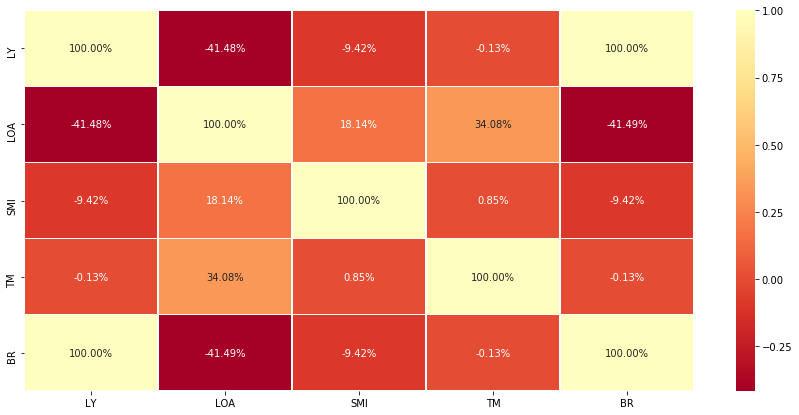

In [27]:
#Show the heatman-correlation plot among all the numeric variables and the variable of interest(borrower's cost)
plt.figure(figsize = [15, 7])
sns.heatmap(chidf[['LY','LOA','SMI','TM',
                    'BR']].corr(), linewidths=0.30, annot = True, fmt = '.2%',
           cmap = 'RdYlGn', center = 1);

> _From the correlation heatmap of the numeric variable in dataset above, it can be seen the different relationship or association between various of numeric variables including our variable of interest (Lender's Yield). As evident from the hitmap visual, Lender's Yield has perfect positive relation with Borrower's Rate..._

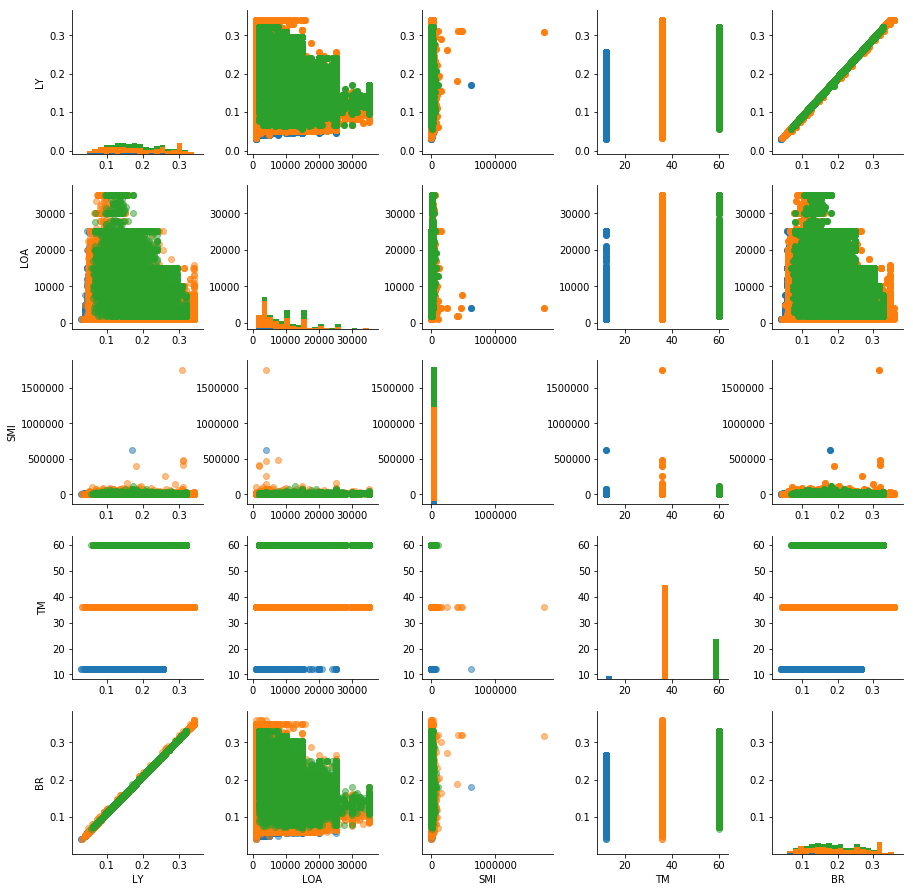

In [28]:
#Display the visual relationship using scatter plot among all the numeric variables 
#And use the loan's term as hue for legend
graph = sns.PairGrid(data = chidf, vars = ['LY',
                    'LOA','SMI','TM', 'BR'], hue="TM")
graph = graph.map_diag(plt.hist, bins=20)
graph.map_offdiag(plt.scatter, alpha=0.5)
graph.map_upper(plt.scatter, cmap = "Blues_d")
#graph.map_lower(sns.kdeplot)
#graph.map_diag(sns.kdeplot, lw = 3, legend = False);

> _As seen from the visual matrix of Lender Yield (%) which is for the most part somewhere in the range of 0.01 and 0.4, the variable of interest has jumbled negative relationship with credit and is by all accounts for the most part upward extent to month to month pay. For term, for 40-month term, the interest appears to have higher's scope of borrower's expense and lower with 10-month term. Finally, it shows totally sure connection. Also, other numeric factors similarly have their relationship displayed as should be visible_...

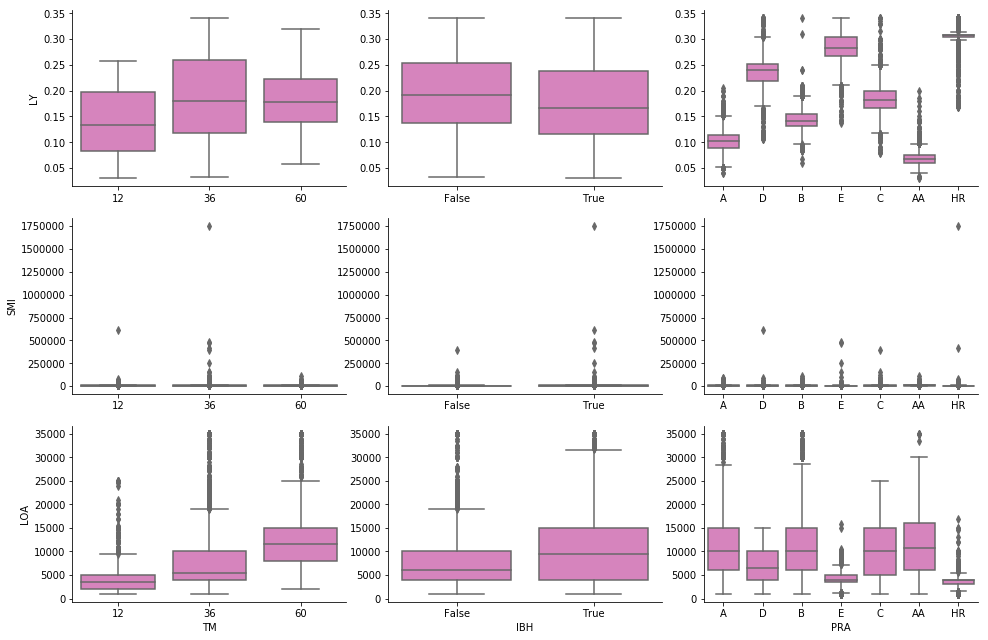

In [29]:
# plot matrix of numeric features against categorical features.
def showmegrid(x, y, **kwargs):
    """ This function creates seaborn's PairGrid of variable of interest with respect to the 
    non-numeric fields in the dataset. """
    bc = sns.color_palette()[6]
    sns.boxplot(x, y, color = bc)

plt.figure(figsize = [10, 10])
h = sns.PairGrid(data = chidf, y_vars = ['LY', 'SMI','LOA'], 
                x_vars = ['TM','IBH','PRA'], size = 3, aspect=1.5)
h.map(showmegrid, bins=20)

> _The above visual network shows the crate and hair plot dispersion of each numeric variable including the objective one displayed in term, homeownerborrowe and porsper's appraising.
For advance's term equivalent to year, the typical borrower's expense is lower than 0.2, while it is 0.2 for term of 36 and 60. While three year term have most extreme rate more prominent 0.5, the other two terms are brings down. The Property holder have below borrower's expense than non-property holder, same things apply in least and greatest borrower's expense. From the thrive's evaluating against borrower's expense, AA has the most minimal typical borrower's expense follow by An and afterward B. HR, E and D have most noteworthy normal borrower's expense as well as their separate greatest borrower's expense in correlation with the others_

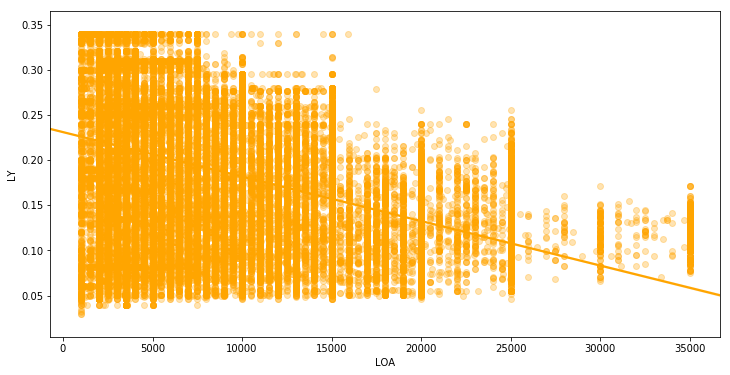

In [30]:
#Display the regression plot between the Lender Yield and Loan Original Amount
plt.figure(figsize = [12, 6])
sns.regplot(data = chidf, x = 'LOA', 
           y = 'LY', scatter_kws={'alpha':0.3}, color='orange')

>  As should be visible from the figure, the relapse line is adversely slant, and this infer that the higher the credit sum the lower it is normal that borrower's expense would be - and the chance of happening is less likely given the relapse line. What's more, the lower the credit's sum the high plausible the borrower's expense...

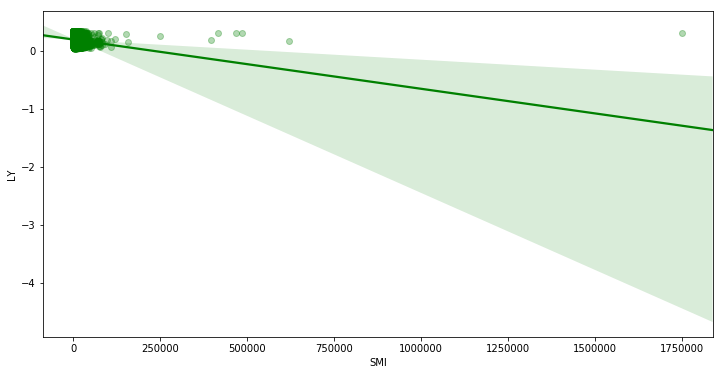

In [31]:
#Display the regression plot between the Lender Yield and Loan Original Amount
plt.figure(figsize = [12, 6])
sns.regplot(data = chidf, x = 'SMI', 
           y = 'LY', scatter_kws={'alpha':0.3}, color='green')

> _From the figure above, the Lender Yield has negatively but weak relationship. And this suggest that the higher the income, the lower the borrower's cost. In fact, some income level suggest that the Lender Yield would likely to be negative. Nonetheless, majority the stated monthly income falls below 250,000 and they borrower's cost between 0 and 0.5._

Text(0.5,1,'BorrowerRate Vs LenderYield')

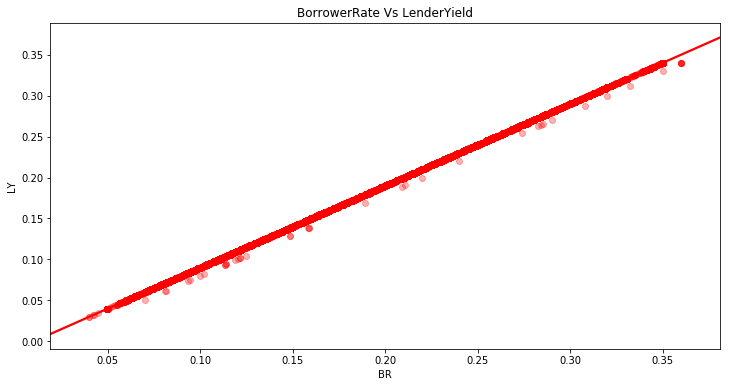

In [32]:
#Display the regression plot between the Lender Yield and Borrower's Rate
plt.figure(figsize = [12, 6])
sns.regplot(data = chidf, x = 'BR', 
           y = 'LY', scatter_kws={'alpha':0.3}, color='red')

plt.title('BorrowerRate Vs LenderYield')

> _From visual above, it is appear that the correlation between lender yield and borrower rate is perfect_

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> _From the heatmap above, it tends to be seen the different relationship or relationship between different of numeric factors including our variable of interest (Lender Yield). As apparent from the hitmap visual, borrower's expense has practically ideal positive connection with bank yield, no relationship with term, incredibly regrettable frail connection with expressed month to month pay and fair bad correaltion with credit sum..._

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> _As seen from the visual lattice of borrower's expense (%) which is generally somewhere in the range of 0.01 and 0.4, the variable of interest has jumbled negative relationship with credit and is by all accounts for the most part upward extent to month to month pay. For term, for 40-month term, the interest appears to have higher's scope of borrower's expense and lower with 10-month term. Finally, it shows completely sure connection with moneylender's yeild rate. Also, other numeric factors similarly have their relationship displayed as should be visible..._

> _For advance's term equivalent to year, the typical borrower's expense is lower than 0.2, while it is 0.2 for term of 36 and 60. While three year term have most extreme rate more prominent 0.5, the other two terms are brings down. The Mortgage holder have below borrower's expense than non-mortgage holder, same things apply in least and greatest borrower's expense. From the flourish's evaluating against borrower's expense, AA has the least typical borrower's expense follow by An and afterward B. HR, E and D have most noteworthy normal borrower's expense as well as their particular greatest borrower's expense in correlation with the others..._

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0.5,0.98,"Relationship Between Lender's Rating (%) and Monthly Income as Per Loan Terms")

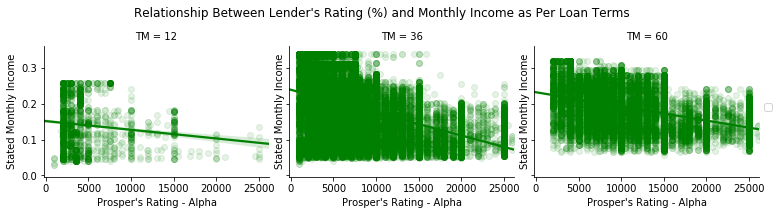

In [41]:
#Given that there are three term's effect from the loan's data,
#Examine the effect of term (loan's lengths in month) on borrower's cost (%) and amount of loan requested
ch1=sns.FacetGrid(data=chidf, aspect=1.2, col='TM', col_wrap=3)
ch1.map(sns.regplot, 'LOA', 'LY', x_jitter=0.04, scatter_kws={'alpha':0.1}, color="green")
ch1.add_legend()
ch1.set(xlabel="Prosper's Rating - Alpha", ylabel="Stated Monthly Income")
ch1.fig.subplots_adjust(top=.8)
ch1.fig.suptitle("Relationship Between Lender's Rating (%) and Monthly Income as Per Loan Terms")

> _For the term of a year, it appears to be that greater part that looked for it for the most part go for 5,000. Furthermore, as this should be visible above, there is negative however frail connection between credit sum and Lender Yield._

> _For the term of three years, there shows up most Lender Yield went for this and the negative yet modestly relationship was derived. Most advance looks for go for credit sum somewhere in the range of 5,000 and 25,000 not at all like lower terms._

> _For the term of 60 months, the slant of advance sum concerning borrower's expense is more extreme the leftover two and this show there is negative connection between the two and most credit looks for go for advance sum somewhere in the range of 5,000 and 25,000 dissimilar to those with a year term._

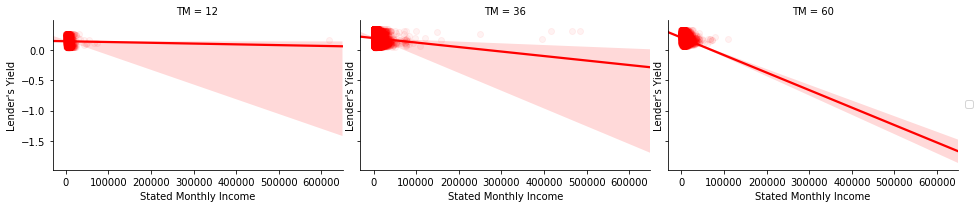

In [34]:
#Given that there are three term's effect from the loan's data,
#Examine the effect of term (loan's lengths in month) on borrower's cost (%)
#And the claimed monthly income of the loan seekers
ch2=sns.FacetGrid(data=chidf, aspect=1.5, col='TM', col_wrap=3)
ch2.map(sns.regplot, 'SMI', 'LY', x_jitter=0.05, scatter_kws={'alpha':0.05}, color="red");
ch2.add_legend()
ch2.set(ylabel="Lender's Yield", xlabel="Stated Monthly Income")
ch2.fig.subplots_adjust(top=.8)
ch2.fig.suptitle("Relationship Between Lender's Yield and Monthly Income as Per Loan Terms")

> _For the term of a year, it has all the earmarks of being that larger part that searched for it by and large go for 5,000. Additionally, as this ought to be noticeable above, there is negative yet fragile association between advance aggregate and borrower's expense._

> _For the term of three years, there appears most development searchers went for this and the negative yet humbly relationship was assembled. Most development searches for go for credit aggregate some place in the scope of 5,000 and 25,000 not at all like cut down terms._

> _For the term of 60 months, the grade of credit aggregate in regards to borrower's cost is more outrageous the extra two and this show there is negative association between the two and most development searches for go for credit total some place in the scope of 5,000 and 25,000 not at all like those with a year term._

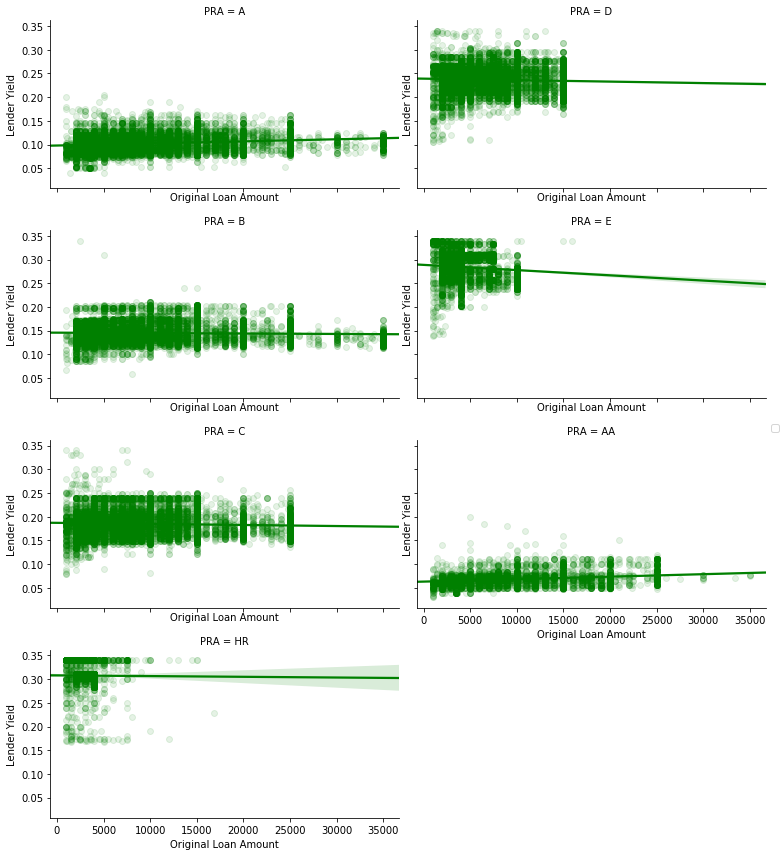

In [35]:
#Given that there are many recorded rating from the loan's data,
#Examine the effect of prosper's rating (A,AA,B, D etc) on borrower's cost (%)
#And the claimed monthly income of the loan seekers
ch3=sns.FacetGrid(data=chidf, aspect=1.8, col='PRA', col_wrap=2)
ch3.map(sns.regplot, 'LOA', 'LY', x_jitter=0.04, scatter_kws={'alpha':0.1}, color='green')
ch3.add_legend()
ch3.set(xlabel='Original Loan Amount', ylabel='Lender Yield')

> _The visual grid exhibit the relationship between borrowing cost (our variable of interest) and loan amount as per the rating. The C rating show that borrowing cost might not change for any amount of loan sought and the same thing for A, D, and B ratings. Only E, AA and HR that have a slight possible change in borrowing cost with respect to loan amount request._

In [ ]:
#Examine the effect of term (loan's lengths in month) on:
#First, claimed montly income and Prosper's rating
#Second, Loan amount sought and Prosper's rating
fig, ax = plt.subplots(ncols=2, figsize=[15,7])
sns.pointplot(data = chidf, x = 'PRA', y = 'SMI', hue = 'TM',
           palette = "rocket", linestyles = '', dodge = 0.4, ax=ax[0])
sns.pointplot(data = chidf, x = 'PRA', y = 'LOA', hue = 'TM',
           palette = "mako", linestyles = '', dodge = 0.4, ax=ax[1])
sns.set(xlabel="Prosper's Rating - Alpha", ylabel="Stated Monthly Income")

> _For the connection between month to month pay and rating as seen above, having a superior rating doesn't suggest that one's month to month pay is higher. Those whose expressed month to month pay is more than 12,000 appear to have a D rating and year term. What's more, it is similarly seen from the information the vast majority that truly do go for year term have higher pay - And this seem OK in a wway higher pay would have the option to take care of the credit as quickly as time permits. For the connection between Succeed's appraising and advance sum looked for, true to form better appraisals will quite often go for higher credit's terms, for example, 36 and 60 months and the evaluations that are bad as them will quite often go for lower sum for 36 and 60-month terms. This is apparent in credit unique sum and succeed rating (Alpha)._

### Discuss a portion of the connections you saw in this piece of the examination. Were there includes that fortified each other as far as taking a gander at your feature(s) of interest?

> _From the perception gathered from different visual portrayals, there is loan specialist's yeild that appears to strenghten getting cost (rate) as the two factors are impeccably decidedly related with one another. What's more, different rating from Flourish information shows that they strenthen each other in term of deciding getting cost of credits be it in 12, 35 or 60-month term. Lastly, the advance's add up to run in inverse of each other._

### Were there any fascinating or astonishing associations between highlights?

### Discuss a portion of the connections you saw in this piece of the examination. How did the feature(s) of interest change with different highlights in the dataset?

> _From the heatmap above, it very well may be seen the different relationship or relationship between different of numeric factors including our variable of interest (borrower's cost(%)). As apparent from the hitmap visual, borrower's expense has practically ideal positive connection with bank yield, no relationship with term, incredibly bad powerless connection with expressed month to month pay and fair regrettable correaltion with advance sum._

### Did you notice any fascinating connections between different elements (not the fundamental feature(s) of interest)?

> _As seen from the visual matrix of borrower's expense (%) which is for the most part somewhere in the range of 0.01 and 0.4, the variable of interest has jumbled negative relationship with credit and is by all accounts for the most part upward extent to month to month pay. For term, for 40-month term, the interest appears to have higher's scope of borrower's expense and lower with 10-month term. Finally, it shows completely certain connection with moneylender's yeild rate. Also, other numeric factors similarly have their relationship displayed as should be visible..._

> _For credit's term equivalent to year, the typical borrower's expense is lower than 0.2, while it is 0.2 for term of 36 and 60. While three year term have most extreme rate more prominent 0.5, the other two terms are brings down. The Property holder have below borrower's expense than non-mortgage holder, same things apply in least and greatest borrower's expense. From the thrive's evaluating against borrower's expense, AA has the most reduced typical borrower's expense follow by An and afterward B. HR, E and D have most noteworthy normal borrower's expense as well as their particular greatest borrower's expense in correlation with the others._

## Conclusions

> _This dataframe was utilized for the exploratory examination, yet this investigation there were fighting advances that were performed to evaluate and cleaned for its neatness and untidiness. The information fighting performed are attributing the missing qualities for the segments, convert closeddate to datetime information type, change valid and misleading of isborrowerhomeowner to property holder and non mortgage holder, and component architect of Lender Yield and Borrower Rate._

> _Our variable of interest which is getting cost has areas of strength for a withlender's yield, decently powerless yet relationship with unique credit sum. Furthermore, scarcely no relationship or relationship with term. A rating of Succeed similarly that portray that the higher credit's term for the rating, the plausible significant expense of getting cost and this B and D evaluations, while other rating classes changing and inorder getting cost across the credit's term. Despite the fact that as seen in the figure above, AA has most reduced Lender Yield for advance's term of 12, 36 and 60 separately for least expense, lower and minimal expense of acquiring._

> _The C rating show that getting cost probably won't change for any measure of advance looked for and exactly the same thing for A, D, and B evaluations. Just E, AA and HR that have a slight conceivable change in getting cost concerning credit sum demand. While it appears to be that larger part that looked for it for the most part go for 5,000. What's more, as this should be visible above, there is negative yet powerless connection between advance sum and borrower's expense. For the connection between Thrive's appraising and advance sum looked for, true to form better evaluations will more often than not go for higher credit's terms, for example, 36 and 60 months and the appraisals that are bad as them will more often than not go for lower sum for 36 and 60-month terms. This is apparent in credit unique sum and flourish rating (Alpha)._

> _Regardless, or the connection between month to month pay and rating as seen above, having a superior rating doesn't infer that one's month to month pay is higher. Those whose expressed month to month pay is more than 12,000 appear to have a D rating and year term. Furthermore, it is similarly seen from the information a great many people that really do go for year term have higher pay - And this seem OK in a manner higher pay would have the option to take care of the credit at the earliest opportunity. As there shows up most advance searchers went for this and the negative however reasonably relationship was induced. Most advance looks for go for credit sum somewhere in the range of 5,000 and 25,000 not at all like lower terms. For the term of 60 months, the incline of advance sum regarding borrower's expense is more extreme the excess two and this show there is negative connection between the two and most credit looks for go for advance sum somewhere in the range of 5,000 and 25,000 dissimilar to those with a year term._